In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
#import data files
city_data = "../Resources/city_data.csv"
ride_data = "../Resources/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [3]:
#peek at city data
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# check for rows with null data
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
city_df['type'].unique()[0]

for i in range(0,len(city_df['type'].unique())):
    print(city_df['type'].unique()[i],":",sum(city_df['type']==city_df['type'].unique()[i]))

Urban : 66
Suburban : 36
Rural : 18


In [7]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
df = pd.merge(ride_df,city_df, how='left', on = ['city','city'])
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#create df's according to city type
urban_df = df[df['type']=='Urban']
suburban_df = df[df['type']=='Suburban']
rural_df = df[df['type']=='Rural']

# first item in rural df
rural_df.iloc[0,0]

'Randallchester'

In [11]:
# get ride count in urban cities
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [12]:
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [13]:
#compute ride counts for each city type
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [14]:
#compute ave fare for each city type
urban_avg_fare = urban_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_df.groupby('city').mean()['fare']
rural_avg_fare = rural_df.groupby('city').mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [15]:
#compute driver counts for each city type
urban_driver_count = urban_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

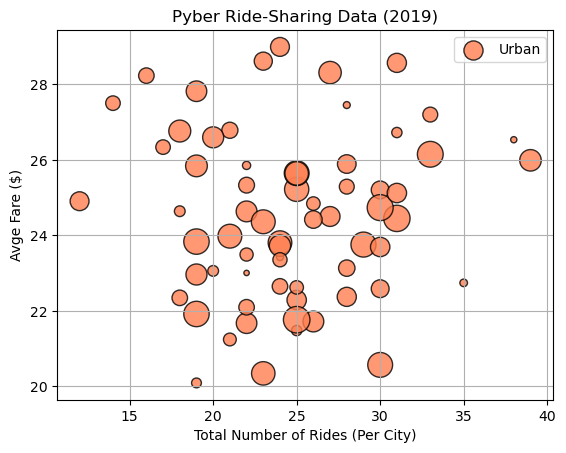

In [16]:
# urban scatter plot
plt.scatter(urban_ride_count,
            urban_avg_fare,             
            s = 5*urban_driver_count,
            c='coral',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Avge Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

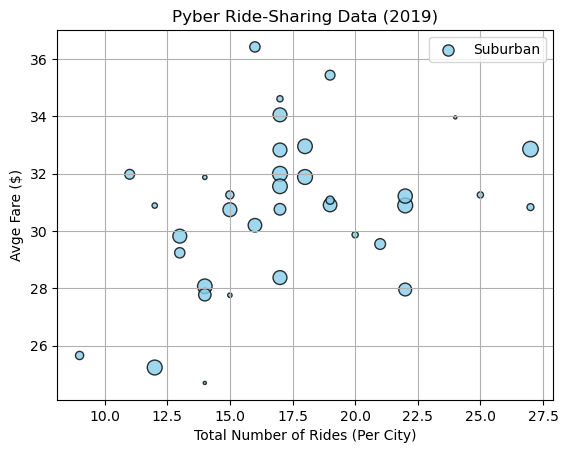

In [17]:
# suburban scatter plot
plt.scatter(suburban_ride_count,
            suburban_avg_fare,             
            s = 5*suburban_driver_count,
            c='skyblue',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Suburban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Avge Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

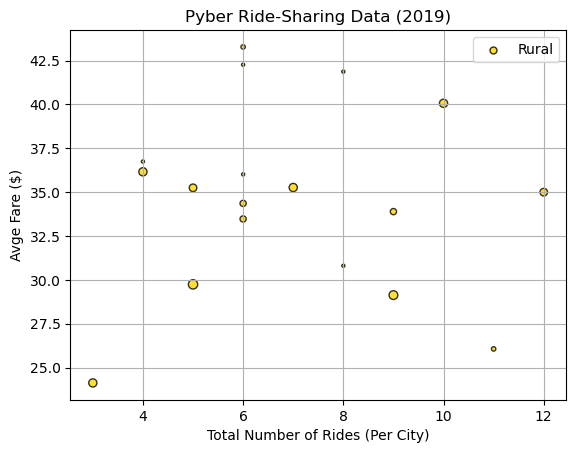

In [18]:
# rural scatter plot
plt.scatter(rural_ride_count,
            rural_avg_fare,             
            s = 5*rural_driver_count,
            c='gold',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Rural')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Avge Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

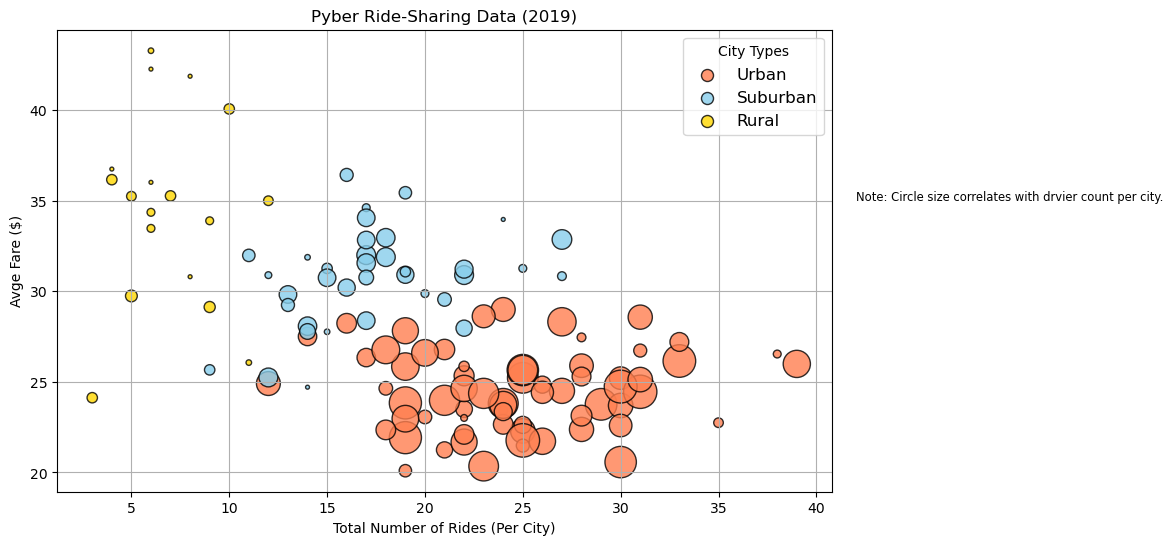

In [19]:
# combined scatter plots

# set figure size
plt.subplots(figsize=(10,6))

#add scatter plots
plt.scatter(urban_ride_count,
            urban_avg_fare,             
            s = 8*urban_driver_count,
            c='coral',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Urban')


plt.scatter(suburban_ride_count,
            suburban_avg_fare,             
            s = 8*suburban_driver_count,
            c='skyblue',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Suburban')


plt.scatter(rural_ride_count,
            rural_avg_fare,             
            s = 8*rural_driver_count,
            c='gold',
            edgecolor='k',
            linewidths=1,
            alpha=0.8,
            label='Rural')


#add other chart elements
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Avge Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

#add legend
lgnd = plt.legend(fontsize='12',mode='Expanded',scatterpoints=1,loc='best',title = 'City Types')

for i in range(0,3):
    lgnd.legendHandles[i]._sizes = [75]

#add text comment
plt.text(42,35,("Note: Circle size correlates with drvier count per city."),fontsize = 'small',wrap=True)

# Save the figure.
plt.savefig('../Deliverables/Fig1.png')

In [20]:
# 5.4.1 summary stats
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [21]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [22]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [23]:
suburban_driver_count.describe()

count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [24]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [27]:
round(urban_ride_count.median())

24

In [28]:
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [29]:
sts.mode(suburban_ride_count)

/var/folders/r0/rlbl1_c51vg6w07hswqfs0x80000gn/T/ipykernel_17847/3864829335.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sts.mode(suburban_ride_count)


ModeResult(mode=array([17]), count=array([7]))

In [30]:
sts.mode(rural_ride_count)

/var/folders/r0/rlbl1_c51vg6w07hswqfs0x80000gn/T/ipykernel_17847/2768196820.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sts.mode(rural_ride_count)


ModeResult(mode=array([6]), count=array([5]))

In [47]:
#5.4.2 summary stats for fare by city type

urban_fares = urban_df['fare']
suburban_fares = suburban_df['fare']
rural_fares = rural_df['fare']

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [32]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


/var/folders/r0/rlbl1_c51vg6w07hswqfs0x80000gn/T/ipykernel_17847/244280386.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fares = sts.mode(urban_fares)


In [33]:
# 5.4.3 summary stats for number of drivers by city type

# Get the driver count data from the urban cities.
# urban_drivers = urban_df['driver_count']
# urban_drivers.head()


#skill drill 5.4.3
# city_type = df['type'].unique()

for i in range(0,len(df['type'].unique())):
    print(f"{df['type'].unique()[i]} mean driver count is {round(df[df['type']==df['type'].unique()[i]]['driver_count'].mean(),1)}")
    print(f"{df['type'].unique()[i]} median driver count is {round(df[df['type']==df['type'].unique()[i]]['driver_count'].median(),2)}")
    print(f"{df['type'].unique()[i]} mode driver count is {sts.mode(df[df['type']==df['type'].unique()[i]]['driver_count'],keepdims=False)[0]} and there are {sts.mode(df[df['type']==df['type'].unique()[i]]['driver_count'],keepdims=False)[1]} occurences.")
    print('\n')

Urban mean driver count is 36.7
Urban median driver count is 37.0
Urban mode driver count is 39 and there are 86 occurences.


Suburban mean driver count is 13.7
Suburban median driver count is 16.0
Suburban mode driver count is 20 and there are 79 occurences.


Rural mean driver count is 4.3
Rural median driver count is 4.0
Rural mode driver count is 1 and there are 32 occurences.




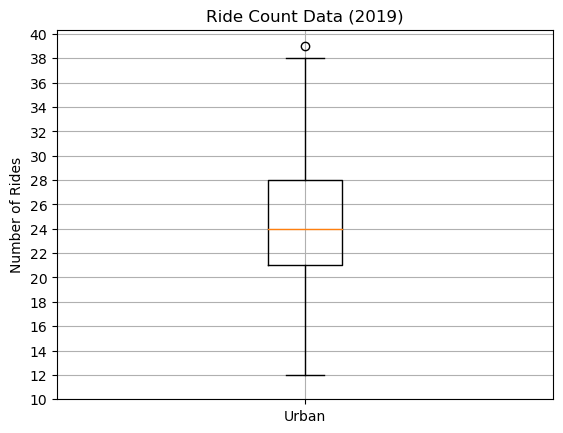

In [34]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

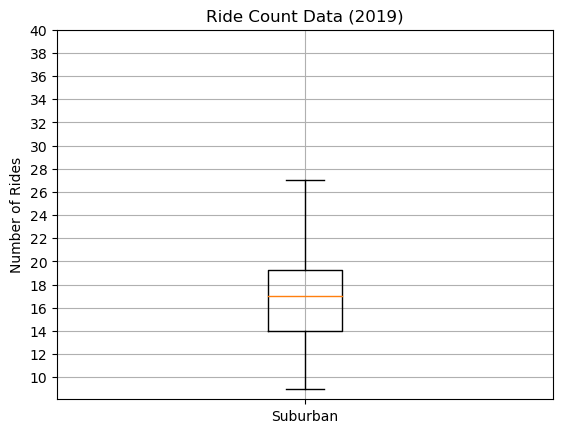

In [39]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
# plt.show()

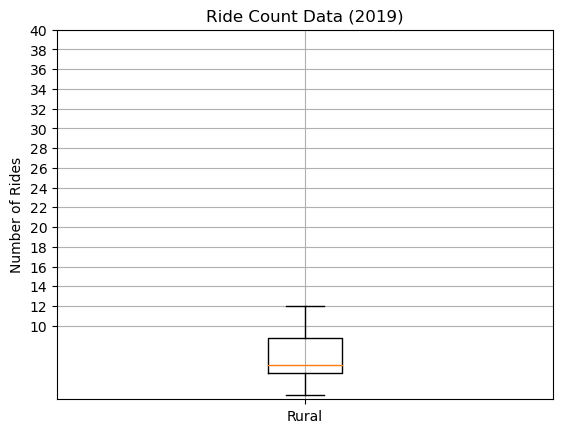

In [38]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
# plt.show()

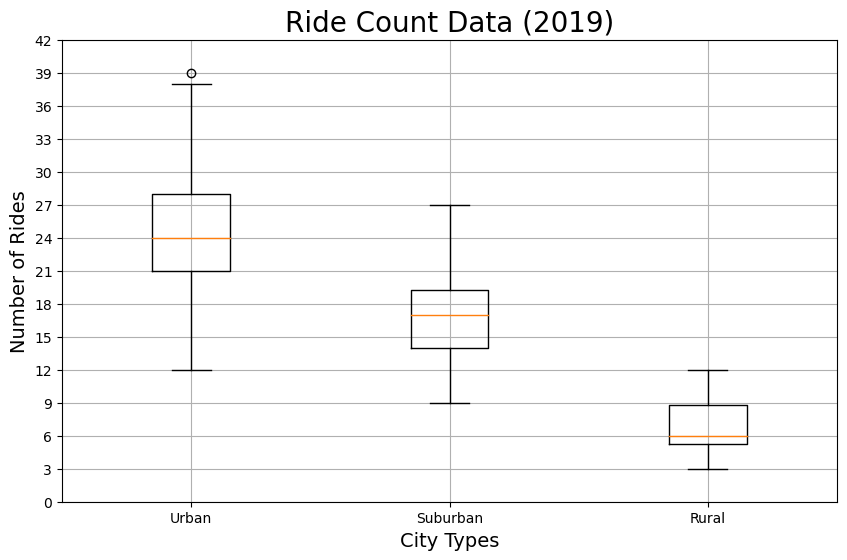

In [41]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("../Deliverables//Fig2.png")
# plt.show()

In [45]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count of 39 which is an outlier.")

West Angela has the highest rider count of 39 which is an outlier.


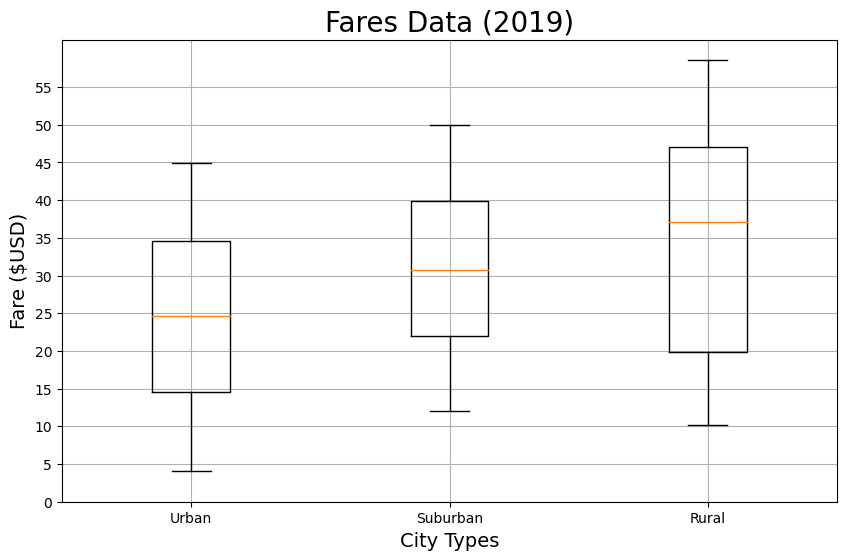

In [50]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Fares Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("../Deliverables//Fig3.png")
# plt.show()

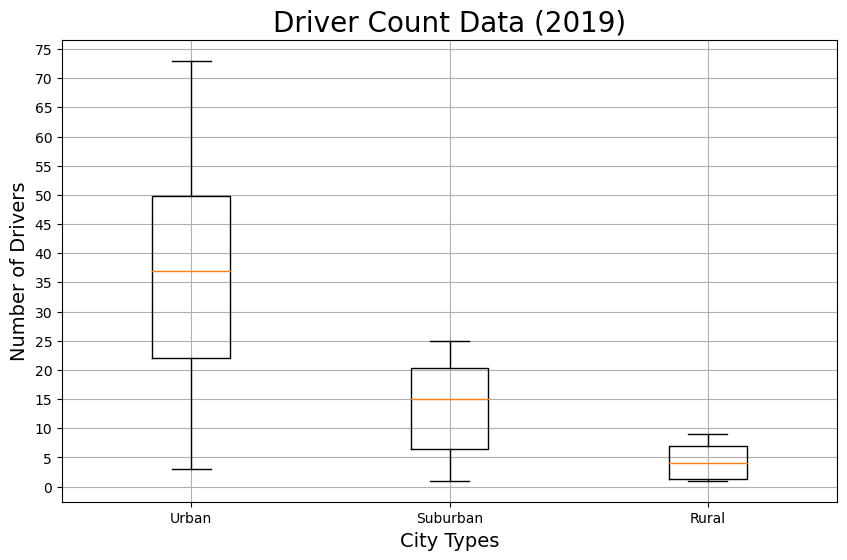

In [53]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("../Deliverables//Fig4.png")
# plt.show()